# Grammys Project

In this project, I will explore a dataset from the Grammys organization with both the recording academy and Grammys websites to determine the impact of splitting up the two websites, and analyzing the data for a better understanding of trends and audience behavior on both sites.  

## Data Dictionary
Looking at `grammys_live_web_analytics.csv` and `ra_live_web_analytics.csv`.


# Part I - Exploratory Data Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:

# this formats floating point numbers to two decimal places when shown in pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Task 2

Load the following files for analysis:`grammy_live_web_analytics.csv` and `ra_live_web_analytics.csv`.



In [3]:
# Read in dataframes
full_df = pd.read_csv('datasets/grammy_live_web_analytics.csv')
rec_academy= pd.read_csv('datasets/ra_live_web_analytics.csv')

In [4]:
# preview full_df dataframe
full_df.sample(10)

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
732,2019-01-03,24163,44051,26006,10426,111,0,0
1855,2022-01-30,39931,81186,43743,26636,61,0,0
371,2018-01-07,30527,76914,32303,12127,106,0,0
621,2018-09-14,22600,32157,23539,11979,300,0,0
1191,2020-04-06,16350,22036,17404,8274,92,0,0
871,2019-05-22,12342,15532,11637,6589,76,0,0
2313,2023-05-03,18070,32890,19495,10325,73,0,0
1765,2021-11-01,17467,32774,18866,9200,85,0,0
1500,2021-02-09,33478,69823,36131,16476,91,0,0
213,2017-08-02,6357,11135,6832,3701,97,0,0


In [5]:
# preview rec_academy dataframe
rec_academy.sample(10)

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
169,2022-07-20,1410,3491,1795,1219,164,0,0
252,2022-10-11,3688,12321,4195,95,101,0,0
476,2023-05-23,1342,4223,1733,978,156,0,0
146,2022-06-27,928,2248,1165,765,145,0,0
47,2022-03-20,1006,2165,1103,722,72,0,0
9,2022-02-10,1134,3473,1341,727,140,0,0
327,2022-12-25,735,3053,873,181,163,0,0
324,2022-12-22,1544,6421,1894,368,156,0,0
333,2022-12-31,1107,4012,1301,253,90,0,0
373,2023-02-09,4395,16272,5240,1106,126,0,0


## Task 3
Here I assess the site statistics for number of users to look for patterns visually.

**A.** A line chart of the number of users on the site for every day in the `full_df`,

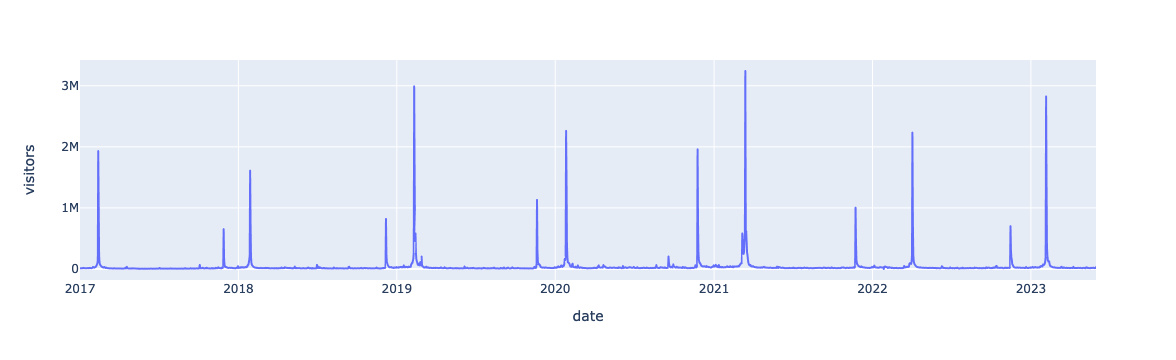

In [9]:
# Plot a line chart of the visitors on the site.
px.line(full_df, x='date', y='visitors')

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Remark:** The smaller spikes, typically around November/December of each year, are when the nominees are announced.</span>


There is a definitive spike in users during a time frame the early in the year that likely correlates to the grammys award show and smaller spikes late in the year that likely represent the time of nominee announcement. Engagement at other times of the year is comparatively low.

## Task 4

Here we look at what an "average" day looks like when the awards show is being hosted versus the other 364 days out of the year.


In [ ]:
# Use the pandas `.groupby()` to calculate the number of visitors on the site based on the values in the column `awards_night`.
full_df.groupby(by='awards_night').agg({'visitors':'mean'})

,visitors
awards_night,
0,32388.28
1,1389590.23



On a regular day the average number of visitors represents roughly 2% of the visitors on an awards night. This represents a significant drop in visitors outside of the Grammys.



## Task 5

Note: When The Recording Academy decided to split their website into two domains, grammy.com and recordingacademy.com, the data capture for grammy.com was not affected. So the `full_df` variable needs to be split separately into two dataframes. The day the domains were switched is on `2022-02-01`.

We will create two new dataframes:

1. `combined_site` for all dates before `2022-02-01`
2. `grammys` for all dates after (and including) `2022-02-01`

In [19]:
# Split the data to separate the full_df into two new dataframes.
# One for before the switch of the websites and one for after
combined_site = full_df[full_df['date']< '2022-02-01']
display(combined_site.sample(10))
grammys = full_df[full_df['date']>= '2022-02-01']
grammys.sample(10)

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
991,2019-09-19,9078,12770,9630,4570,83,0,0
1027,2019-10-25,11573,16098,12315,6094,69,0,0
147,2017-05-28,5186,12019,5566,2796,111,0,0
1848,2022-01-23,24506,40899,26326,11400,106,0,0
1459,2020-12-30,47761,84979,50686,22769,97,0,0
40,2017-02-10,91058,230302,99229,59072,104,1,0
1671,2021-07-30,18069,34359,21997,10627,79,0,0
1127,2020-02-02,94254,145051,98917,44790,90,0,0
104,2017-04-15,8806,15271,9285,6988,62,0,0
1602,2021-05-22,16691,28378,17546,8573,82,0,0


,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
2224,2023-02-03,123104,291271,135224,46639,92,1,0
2000,2022-06-24,11694,26523,12962,6786,87,0,0
2232,2023-02-11,122153,273913,130190,38302,109,1,0
2003,2022-06-27,12283,28034,13568,7243,85,0,0
2066,2022-08-29,19023,45154,20832,10062,85,0,0
1868,2022-02-12,19978,44579,19796,9940,79,0,0
2127,2022-10-29,13558,31928,14589,7050,66,0,0
2280,2023-03-31,17114,32051,18300,9612,77,0,0
2300,2023-04-20,18790,35413,19976,10274,73,0,0
2301,2023-04-21,18368,34490,19436,9864,73,0,0


In [ ]:

# create a deep copy of the dataframes such that future modifications are not reflected in the original
combined_site = combined_site.copy()
grammys = grammys.copy()

In [21]:
# print the shape of the combined_site dataframe
display(combined_site.shape)

(1857, 8)

# Part II - KPIs



Here we look at certain key performance indicators (KPIs) of interest for The Recording Academy.

## Task 6

In [22]:
# create the list of dataframes
frames = [combined_site, rec_academy, grammys]

**B.** For each frame in the frames list, we will create a new column `pages_per_session`. This new column is the average number of pageviews per session on a given day. The higher this number the more "stickiness" your website has with your visitors.

In [23]:
# create the `pages_per_session` column for all 3 dataframes.

for frame in frames:
    frame['pages_per_session'] = frame['pageviews'] / frame['sessions']


**C.** Visualize pages per session with a line chart for each site.

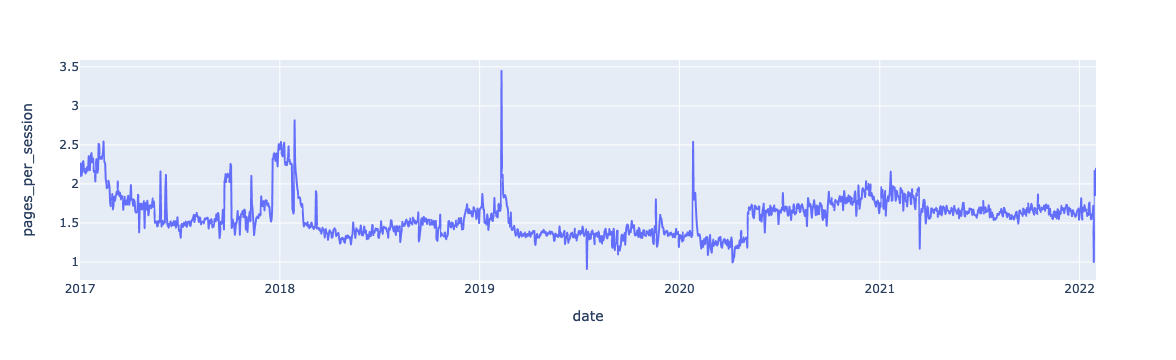

In [29]:
# combined_site graph
px.line(combined_site, x='date',y='pages_per_session')

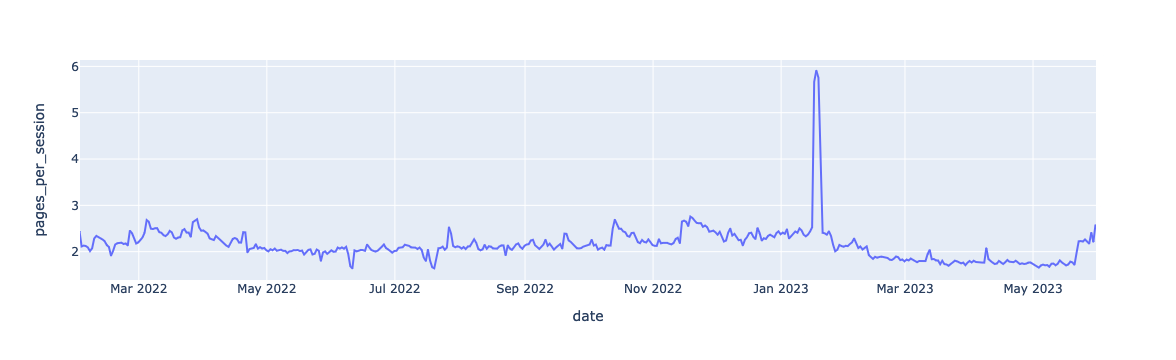

In [30]:
# grammys graph
px.line(grammys, x='date',y='pages_per_session')

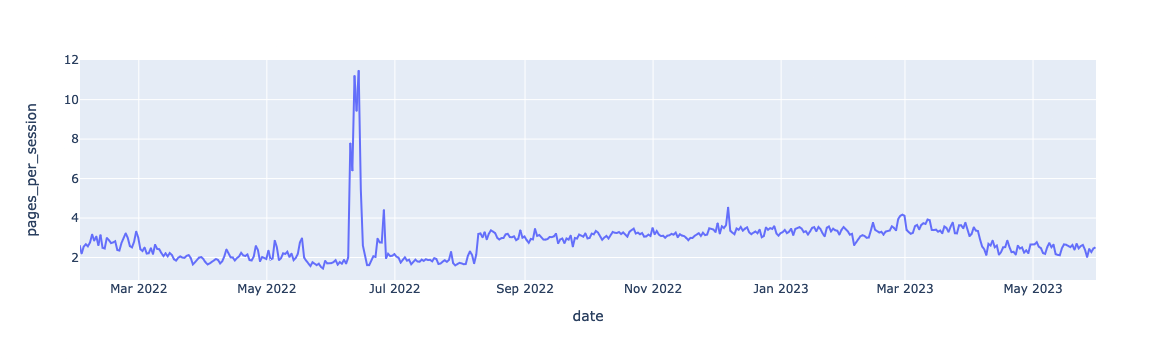

In [31]:
# rec_academy graph
px.line(rec_academy, x='date',y='pages_per_session')

**D.** Note:** Any large spikes in the data that do not correspond with the Grammy Awards Ceremony can be attributed to abnormalities in the data collection process and ignored in the analysis.



Notable on the average day for the combined site before the split is a baseline of visitor pages per session less than 2. This is in contrast to a baseline of closer to 2 and above for both the recording academy and grammys websites after the split, though the data for the grammys website in the last months suggests the trend might be returning to pre-split page per session metrics.

The days surrounding the grammys in particular point to a 2 to 4 fold increase in pages per session for the post-split websites. This data is encouraging and points to the positive impact of splitting the websites, with the recording academy becoming an increasingly accessed resource on an average day. The increase in overall visits to the separate websites on the nights around the Grammys ceremony might be evidence of a clarity of information secondary to the split and/or an overall appeal of content on the websites.

## Task 7

Bounce rate, a measure of the percentage of visitors who come to the site never  interact with the website before leaving, is another important metric for The Recording Academy. In this task, we will define a function that takes in a dataframe as input and outputs the bounce rate.

In [32]:
def bounce_rate(dataframe):
    '''
    Calculates the bounce rate for visitors on the website.
    input: dataframe with bounced_sessions and sessions columns
    output: numeric value from bounce rate
    '''
    # WRITE YOUR CODE BELOW
    # Remember, the input for the function is called `dataframe`
    # So all calculations should reference that variable.

    sum_bounced=dataframe['bounced_sessions'].sum()
    sum_sessions=dataframe['sessions'].sum()
    return 100 * sum_bounced / sum_sessions


**B.** For each website (represented by a dataframe) calculate and print the bounce rate.


In [ ]:
# Calculate the Bounce Rate for each site.
print('The bounce rates for the combined_site, rec_academy, and grammys are:')
for frame in frames:
    br = bounce_rate(frame)
    print(f'{br:0.2f}')

The bounce rate for the combined_site, rec_academy, and grammys is:
41.58
33.67
40.16


**C.** Another useful metric is the average session duration (how long on average visitors are staying on the website).

Here we calculate the average session duration.

In [ ]:
# Calculate the average of the avg_session_duration_secs. 
print('For the combined_site, rec_academy, and grammys the average of the avg_session_duration_secs are:')
for frame in frames:
    mean_asds=frame['avg_session_duration_secs'].mean()
    print(f'{mean_asds:0.2f}')

For the combined_site, rec_academy, and grammys the average of the avg_session_duration_secs are:
102.85
128.50
82.99



The bounce rate for the combined site and the Grammys website are similarly higher possibly reflecting a website where a larger number of users fail to engage with the content. The Recording Academy rate is lower possibly reflecting the more specialized nature of the website and the likelihood that users find the content useful and engaging.
In contrast, the average session duration for the combined site is more like the Recording Academy than the Grammys website, with a longer length of engagement. These two metrics could be points of improvement the Grammys website can focus on, increasing the initial engagement of users and the length of their engagement time.

# Part III - Demographics

Age demographics will tell us more about the users of the website.
This will require reading in two new files and joining them in python.

## Task 8

The `grammys_age_demographics.csv` and `tra_age_demographics.csv` each contain the following information:

- **age_group** - The age group range. e.g. `18-24` are all visitors between the ages of 18 to 24 who come to the site.
- **pct_visitors** - The percentage of all of the websites visitors that come from that specific age group.

In [53]:
# read in the files
age_grammys = pd.read_csv('datasets/grammys_age_demographics.csv')
age_tra= pd.read_csv('datasets/tra_age_demographics.csv')

In [56]:
# preview the age_grammys file. the age_tra will look very similar.
age_grammys

,age_group,pct_visitors
0,18-24,27.37
1,25-34,24.13
2,35-44,18.72
3,45-54,13.57
4,55-64,9.82
5,65+,6.39


**B.** For each dataframe we will create a new column called `website` whose value is the name of the website.
e.g. the `age_grammys` values for `website` should all be `Grammys` and for the `age_tra` they should be `Recording Academy`.

In [60]:
# create the website column
age_grammys['website']= 'Grammys'
age_tra['website'] = 'Recording Academy'
age_grammys

,age_group,pct_visitors,website
0,18-24,27.37,Grammys
1,25-34,24.13,Grammys
2,35-44,18.72,Grammys
3,45-54,13.57,Grammys
4,55-64,9.82,Grammys
5,65+,6.39,Grammys


In [63]:
# use pd.concat to join the two datasets
dfs=[age_grammys, age_tra]
age_df=pd.concat(dfs)


**D.** Here we create a bar chart of the `age_group` and `pct_visitors`. This chart should have, for each age group, one color for the Recording Academy and a different color for the Grammys.



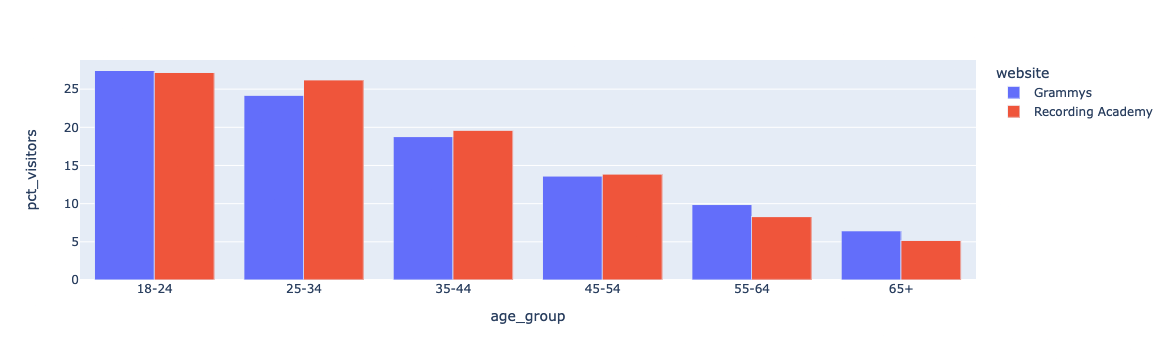

In [64]:
# Create bar chart

px.bar(age_df, x='age_group', y='pct_visitors', color='website', barmode='group')


**E.** Looking at the chart above, it is noteworthy that the demographics for the two websites are similar with the majority of users represented by the 18-24 age group progressively decreasing as the age of the group increases.

# Part IV - Recommendations



From the data we analyzed it appears that the separation of the websites should be maintained because of its positive impact on the metrics of pages_per_session for both websites. Especially as increases in the overall pages per session were noted by the Grammys/Recording Academy data analysis group as a measure that can help generate income from advertisement and point to the depth of engagement of users. The increase in both baseline pages per session and the period surrounding the awards night suggest that the separation improved overall engagement for both websites and the experience for potential user pools involved. 
The secondary benefit of the separation is a small improvement in the bounce rate for the Grammys website and a much greater improvement for the Recording Academy website. Both of these points suggest that the separation improved the amount of engagement each user experienced and whether they engaged at all. 

To further improve the performance of the Grammys website we reiterate that improving the bounce rate and average session duration for the Grammys website should be a priority. 

As a last task we will to determine how the Grammys website is performing relative to The AMA website. In particular, we will be looking at the device distribution and total visits over the same time span and leveraging information about Visit Duration, Bounce Rate, and Pages per visit from earlier.

![](figs/TheAMAs.png)


Note:
Visitors on the AMA website are spending on average, 5 mins and 53 seconds on the site and viewing 2.74 pages per visit (aka session). They have a bounce rate of 54.31%

**A.** Load in the two files. The `desktop_users.csv` and `mobile_users.csv` files contain the users coming from desktop users and mobile users respectively.

Store them in variables named `desktop_users` and `mobile_users`

In [77]:
# Load in the data
desktop_users=pd.read_csv('datasets/desktop_users.csv')
mobile_users=pd.read_csv('datasets/mobile_users.csv')

In [78]:
# preview the desktop_users file
desktop_users.head()

,date,segment,visitors
0,2022-02-01,Desktop Traffic,10195
1,2022-02-02,Desktop Traffic,10560
2,2022-02-03,Desktop Traffic,9935
3,2022-02-04,Desktop Traffic,8501
4,2022-02-05,Desktop Traffic,5424


In [79]:
# preview mobile_users file
mobile_users.sample(5)

,date,segment,visitors
474,2023-05-21,Mobile Traffic,9309
420,2023-03-28,Mobile Traffic,9622
283,2022-11-11,Mobile Traffic,13611
487,2023-06-03,Mobile Traffic,10300
163,2022-07-14,Mobile Traffic,10378


We will join the two datasets here. We will also modify the column names so that it's easier to use.

* change the name of the `visitors` column so that it says which category they come from.
* Additionally, drop the `segment` column since it is no longer needed.

In [84]:
# change name of the visitors column to indicate which category it comes from
desktop_users=desktop_users.rename(columns={'visitors':'desktop_visitors'})
mobile_users=mobile_users.rename(columns={'visitors':'mobile_visitors'})
mobile_users

,date,segment,mobile_visitors
0,2022-02-01,Mobile Traffic,23494
1,2022-02-02,Mobile Traffic,20234
2,2022-02-03,Mobile Traffic,22816
3,2022-02-04,Mobile Traffic,18592
4,2022-02-05,Mobile Traffic,13298
...,...,...,...
510,2023-06-26,Mobile Traffic,7327
511,2023-06-27,Mobile Traffic,9491
512,2023-06-28,Mobile Traffic,9856
513,2023-06-29,Mobile Traffic,12881


In [86]:
# drop the segment column from each dataframe
desktop_users=desktop_users.drop(columns='segment')
mobile_users=mobile_users.drop(columns='segment')
mobile_users

KeyError: "['segment'] not found in axis"

In [87]:
display(desktop_users.head())

,date,desktop_visitors
0,2022-02-01,10195
1,2022-02-02,10560
2,2022-02-03,9935
3,2022-02-04,8501
4,2022-02-05,5424


**C.** Join the two dataframes together in a new variable called `segment_df`.

In [88]:
# join the two dataframes and preview the dataframe
segment_df=pd.merge(desktop_users, mobile_users, left_on='date', right_on='date', how='inner' )
segment_df

,date,desktop_visitors,mobile_visitors
0,2022-02-01,10195,23494
1,2022-02-02,10560,20234
2,2022-02-03,9935,22816
3,2022-02-04,8501,18592
4,2022-02-05,5424,13298
...,...,...,...
510,2023-06-26,4302,7327
511,2023-06-27,5528,9491
512,2023-06-28,4928,9856
513,2023-06-29,5554,12881


**D.** In the next few steps, we will calculate the percentage share of users coming from desktop and mobile on the Grammys website.

Calculate a new column, `total_visitors` that is the addition of `desktop_visitors` and `mobile_visitors`.

In [90]:
# create total_visitors column
segment_df['total_visitors']= segment_df['desktop_visitors']+segment_df['mobile_visitors']
segment_df

,date,desktop_visitors,mobile_visitors,total_visitors
0,2022-02-01,10195,23494,33689
1,2022-02-02,10560,20234,30794
2,2022-02-03,9935,22816,32751
3,2022-02-04,8501,18592,27093
4,2022-02-05,5424,13298,18722
...,...,...,...,...
510,2023-06-26,4302,7327,11629
511,2023-06-27,5528,9491,15019
512,2023-06-28,4928,9856,14784
513,2023-06-29,5554,12881,18435


To calculate the percentage share we will first need to filter the data to dates after (and including) `2023-04-01`. Then calculate the `sum` of desktop visitors and total visitors and divide those values. The percentage share of mobile visitors will be the value needed to get to 100%.

In [98]:
# filter and calculate the percentage share
segment_df = segment_df[segment_df['date']>='2023-04-01']
percent_mobile =1- segment_df['desktop_visitors'].sum()/segment_df['total_visitors'].sum()
total=segment_df['total_visitors'].sum()
print(f'{percent_mobile} {total}')


0.6816326702051548 1428482


**What is the percentage share of desktop and mobile visitors on the Grammys website in the timeframe in question?**
68% of users are mobile, 32% are desktop
Also there is the total number of visitors on the site during this timeframe?**
1428482.

*Comparing metrics: 

-The bounce rate for the combined_site, rec_academy, and grammys are 41.58, 33.67, and 40.16 lower than that of the AMA site.
-
Visitors on the AMA website are spending on average, 5 mins and 53 seconds on the site and viewing 2.74 pages per visit (aka session). They have a bounce rate of 54.31%